In [ ]:
#Load the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data - adjust path if your current working directory in Jupyter is different
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: training.csv not found. Make sure it's in the data/raw/ directory.")
    # Create an empty DataFrame or handle the error appropriately
    df = pd.DataFrame()

C:\Users\eep\AppData\Local\Temp\ipykernel_12172\1937377309.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/data.csv')


Dataset loaded successfully.


In [2]:
#Overview of the Data
print("DataFrame Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataFrame Info:\n")
df.info()

DataFrame Shape: (95662, 96)

First 5 rows:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX        256.0  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          NaN  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX        256.0           NaN   ProductId_1   
3   CustomerId_988          UGX        256.0  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          NaN  ProviderId_4   ProductId_6   

      ProductCategory  

In [3]:
#Summary Statistics
print("\nSummary Statistics for Numerical Features:\n", df.describe())
print("\nSummary Statistics for Categorical Features:\n", df.describe(include='object'))


Summary Statistics for Numerical Features:
        CountryCode        Amount         Value  PricingStrategy   FraudResult  \
count      95660.0  9.566200e+04  9.565900e+04     95659.000000  95662.000000   
mean         256.0  6.718072e+03  9.900640e+03         2.255899      0.002018   
std            0.0  1.233068e+05  1.231240e+05         0.732849      0.044872   
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000   
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000   
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000   
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000   
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000   

       Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  ...  \
count     3.000000          0.0          0.0          0.0          0.0  ...   
mean      0.666667          NaN          NaN          NaN          

C:\Users\eep\AppData\Local\Temp\ipykernel_12172\2504974501.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


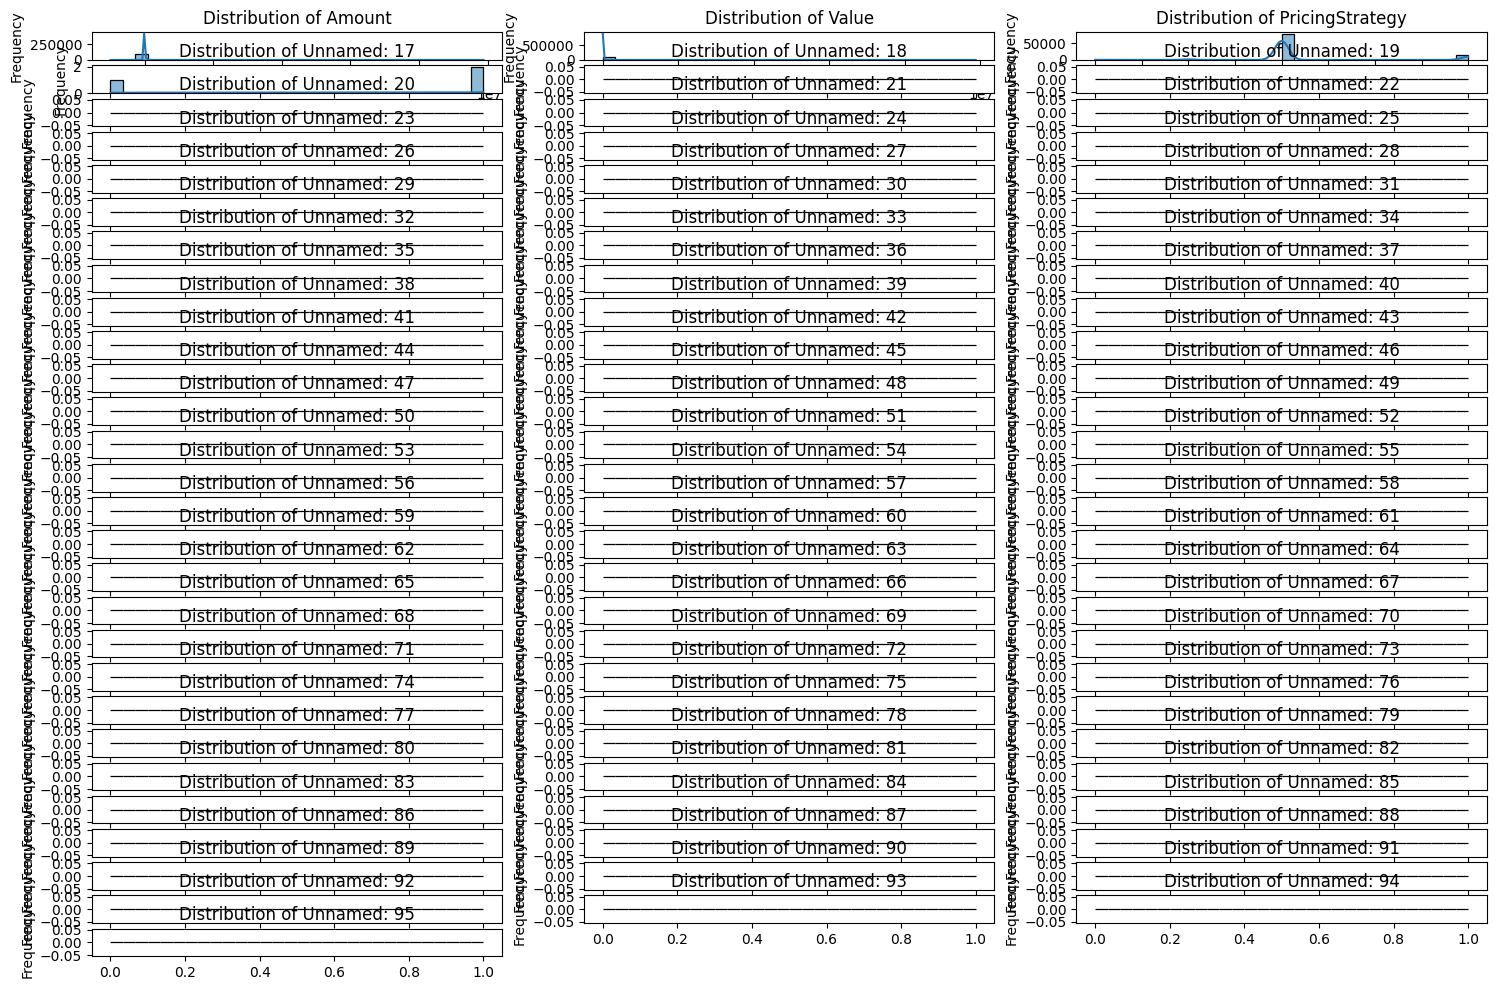

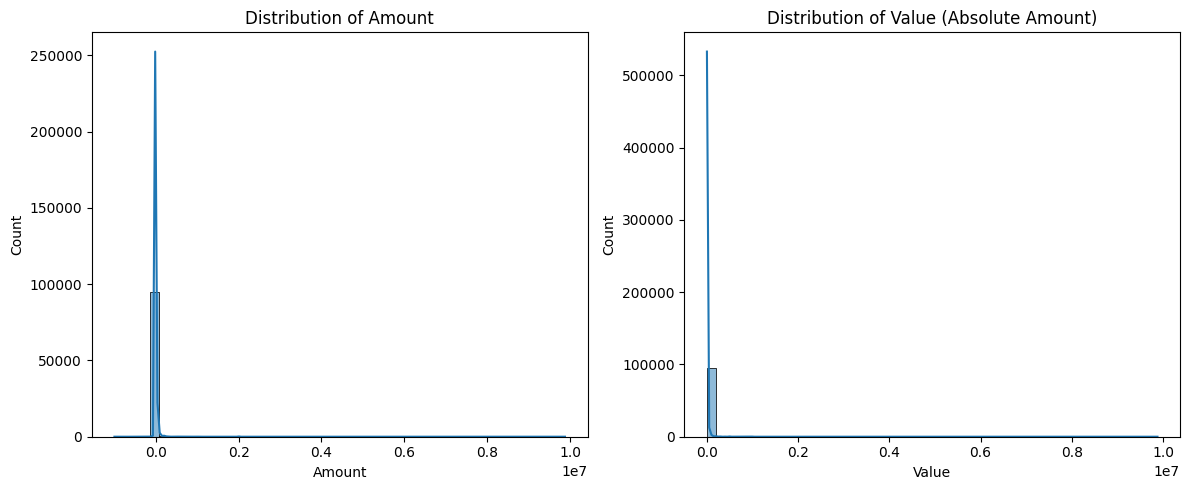

In [4]:
#Distribution of Numerical Features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude IDs and FraudResult for general distribution plotting if they are strictly identifiers/targets
# You might want to plot FraudResult separately as it's binary
cols_to_plot = [col for col in numerical_cols if col not in ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CountryCode', 'FraudResult']]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols_to_plot):
    plt.subplot(len(cols_to_plot)//3 + 1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Special case for 'Amount' and 'Value' - often highly skewed
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount')
plt.subplot(1, 2, 2)
sns.histplot(df['Value'], kde=True, bins=50)
plt.title('Distribution of Value (Absolute Amount)')
plt.tight_layout()
plt.show()

C:\Users\eep\AppData\Local\Temp\ipykernel_12172\821585872.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/data.csv')


Dataset loaded successfully.


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\821585872.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\eep\AppData\Local\Temp\ipykernel_12172\821585872.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

DataFrame shape after initial cleaning: (95661, 14)
Column 'TransactionId' has 95661 unique values, identified as an ID column, skipping direct count plot.
Column 'BatchId' has 94808 unique values, identified as an ID column, skipping direct count plot.
Column 'AccountId' has 3633 unique values, identified as an ID column, skipping direct count plot.
Column 'SubscriptionId' has 3627 unique values, identified as an ID column, skipping direct count plot.
Column 'CustomerId' has 3742 unique values, identified as an ID column, skipping direct count plot.

Proceeding to plot 5 low cardinality categorical columns in batches.
High cardinality/ID columns identified (not plotted as counts): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId']


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\821585872.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax, palette='viridis')
C:\Users\eep\AppData\Local\Temp\ipykernel_12172\821585872.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax, palette='viridis')
C:\Users\eep\AppData\Local\Temp\ipykernel_12172\821585872.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax, palet

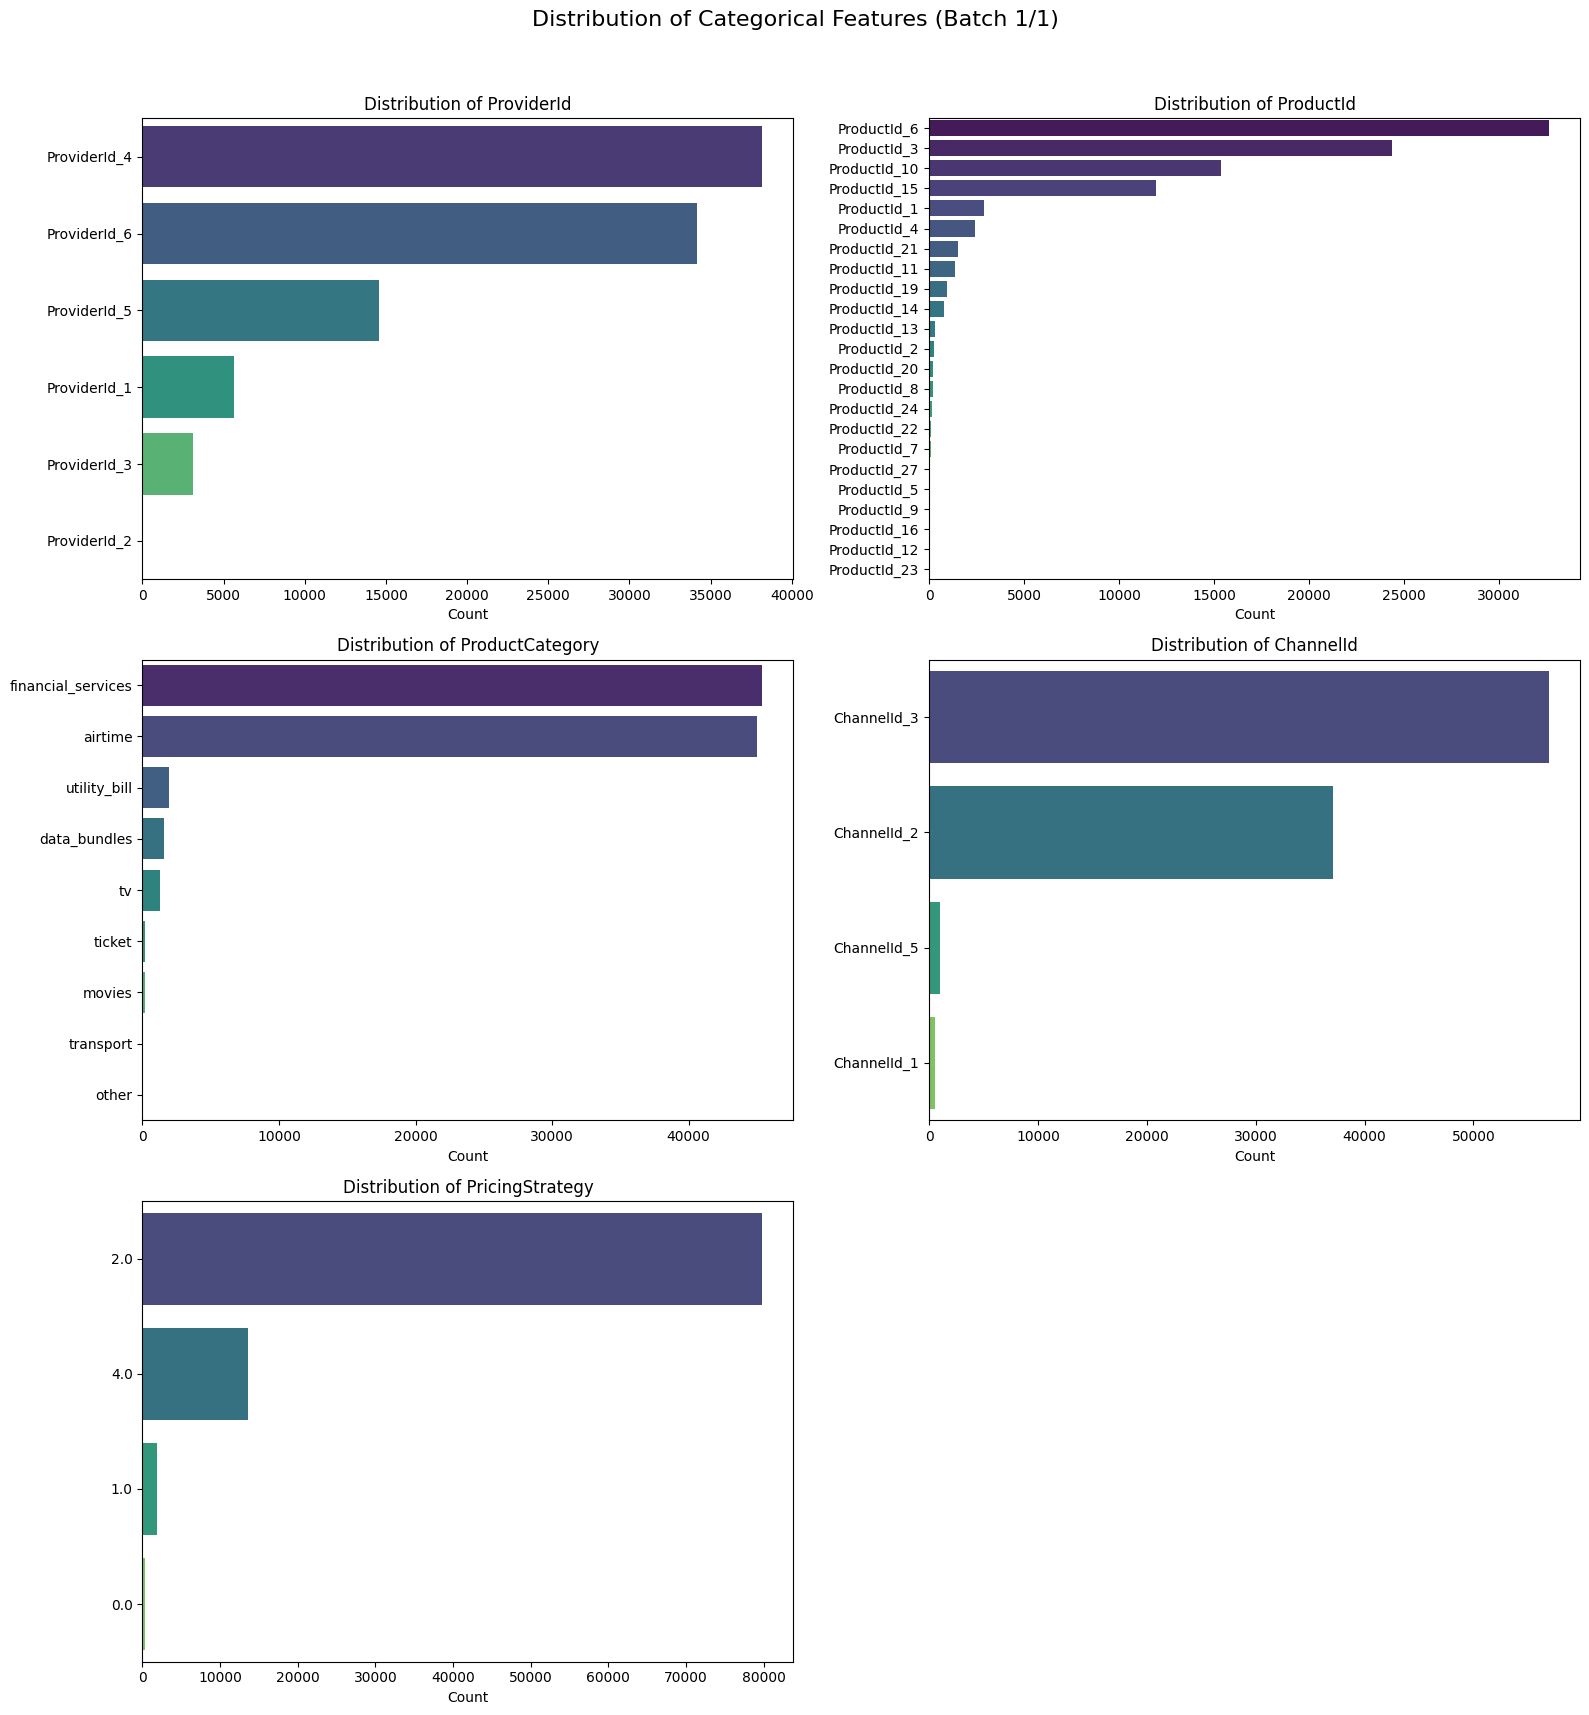


Finished plotting categorical distributions.


In [ ]:
# Load data 
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: data.csv not found. Make sure it's in the data/raw/ directory.")
    df = pd.DataFrame() # Create an empty DataFrame or handle the error appropriately

# --- Data Cleaning (from previous steps) ---
# Drop constant columns identified from summary statistics
columns_to_drop = ['CountryCode', 'CurrencyCode']
df.drop(columns=columns_to_drop, inplace=True)

# Drop 'Unnamed' columns identified as empty
unnamed_cols = [col for col in df.columns if 'Unnamed:' in col and df[col].isnull().all()]
df.drop(columns=unnamed_cols, inplace=True)

# Handle remaining specific 'Unnamed' columns with few non-nulls (e.g., Unnamed: 16, Unnamed: 17)
# It's safer to check and drop if they still exist after the all-null check
remaining_unnamed_cols = [col for col in df.columns if 'Unnamed:' in col and df[col].count() <= 3] # Keep the <=3 check from your info
df.drop(columns=remaining_unnamed_cols, inplace=True)

# Impute missing values (simplified example, detailed imputation for each column may vary)
# For object/categorical: use mode
for col in ['AccountId', 'ProviderId', 'PricingStrategy']: # PricingStrategy is treated as categorical
    if col in df.columns and df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# For numerical: use median
if 'Value' in df.columns and df['Value'].isnull().any():
    df['Value'].fillna(df['Value'].median(), inplace=True)

# For TransactionStartTime: handle missing (e.g., drop the single row)
if 'TransactionStartTime' in df.columns and df['TransactionStartTime'].isnull().any():
    df.dropna(subset=['TransactionStartTime'], inplace=True) # Dropping 1 row is fine

# Convert TransactionStartTime to datetime
if 'TransactionStartTime' in df.columns:
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')
    # If any conversion failed, drop rows where TransactionStartTime is NaT
    df.dropna(subset=['TransactionStartTime'], inplace=True)


print(f"DataFrame shape after initial cleaning: {df.shape}")


# --- Optimized Distribution of Categorical Features Plotting ---

categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Add numerical columns that are actually categorical (e.g., ProviderId, ProductCategory, ChannelId, PricingStrategy)
# Note: CountryCode was dropped, FraudResult is target, ProviderId, ProductCategory, ChannelId are already objects or handled

if 'PricingStrategy' in df.columns and df['PricingStrategy'].dtype != 'object':
    df['PricingStrategy'] = df['PricingStrategy'].astype(str) # Convert to string for categorical plotting
    if 'PricingStrategy' not in categorical_cols:
        categorical_cols.append('PricingStrategy')


# Define a threshold for high cardinality
HIGH_CARDINALITY_THRESHOLD = 50
PLOT_BATCH_SIZE = 6 # Number of plots per figure

low_cardinality_cols = []
high_cardinality_cols = []

for col in categorical_cols:
    if col in ['TransactionId', 'BatchId', 'SubscriptionId', 'AccountId', 'CustomerId']:
        # These are IDs, usually too many unique values to plot meaningfully as counts
        high_cardinality_cols.append(col)
        print(f"Column '{col}' has {df[col].nunique()} unique values, identified as an ID column, skipping direct count plot.")
    elif df[col].nunique() < HIGH_CARDINALITY_THRESHOLD:
        low_cardinality_cols.append(col)
    else:
        high_cardinality_cols.append(col)
        print(f"Column '{col}' has {df[col].nunique()} unique values, likely not a simple categorical for direct plotting. (e.g., ProductId)")


print(f"\nProceeding to plot {len(low_cardinality_cols)} low cardinality categorical columns in batches.")
print(f"High cardinality/ID columns identified (not plotted as counts): {high_cardinality_cols}")


# Plot low cardinality categorical columns in batches
num_plots = len(low_cardinality_cols)
num_batches = (num_plots + PLOT_BATCH_SIZE - 1) // PLOT_BATCH_SIZE # Ceiling division

for batch_idx in range(num_batches):
    start_idx = batch_idx * PLOT_BATCH_SIZE
    end_idx = min((batch_idx + 1) * PLOT_BATCH_SIZE, num_plots)
    current_batch_cols = low_cardinality_cols[start_idx:end_idx]

    if not current_batch_cols:
        continue

    # Determine grid size for current batch
    n_rows = (len(current_batch_cols) + 1) // 2 # 2 columns per row
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 6))
    axes = axes.flatten() # Flatten for easy iteration

    fig.suptitle(f'Distribution of Categorical Features (Batch {batch_idx + 1}/{num_batches})', fontsize=16)

    for i, col in enumerate(current_batch_cols):
        ax = axes[i]
        sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax, palette='viridis')
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel('Count')
        ax.set_ylabel('') # Keep y-label clean

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to make space for suptitle
    plt.show()

print("\nFinished plotting categorical distributions.")

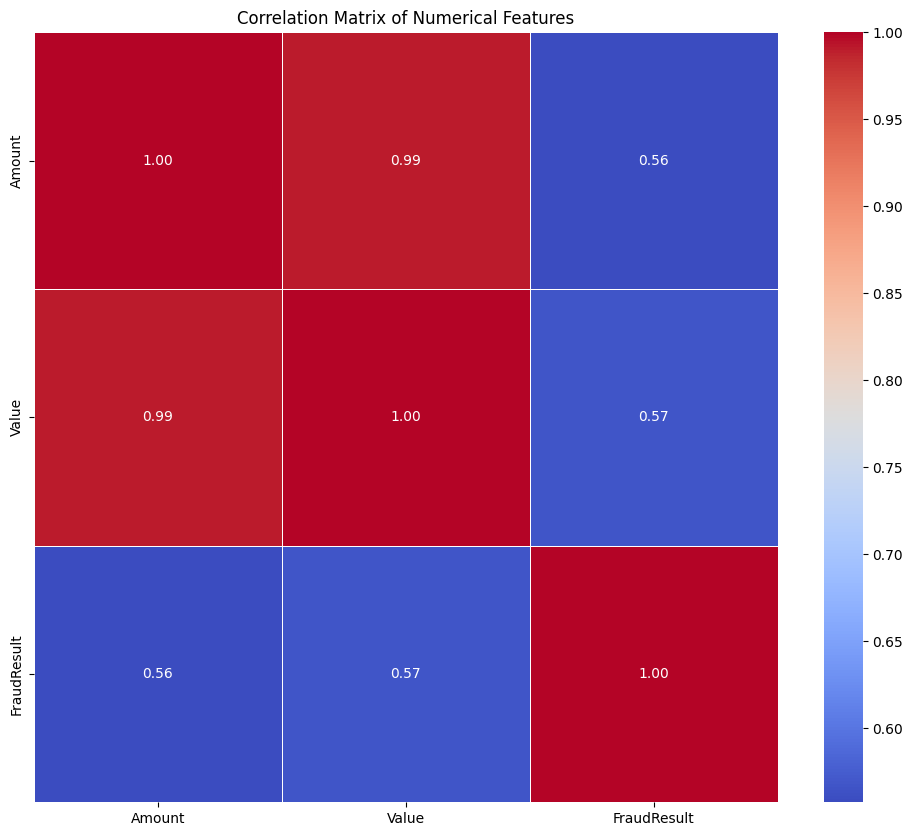


Correlation with FraudResult:
 FraudResult    1.000000
Value          0.566739
Amount         0.557370
Name: FraudResult, dtype: float64


In [10]:
#Correlation Analysis
# Filter for truly numerical columns for correlation
numerical_for_corr = df.select_dtypes(include=np.number).columns.tolist()
# Exclude strict IDs but include Amount, Value, and FraudResult
numerical_for_corr = [col for col in numerical_for_corr if col not in ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId']]

correlation_matrix = df[numerical_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nCorrelation with FraudResult:\n", df[numerical_for_corr].corr()['FraudResult'].sort_values(ascending=False))

Distribution of FraudResult:
FraudResult
0    95468
1      193
Name: count, dtype: int64

Percentage Distribution of FraudResult:
FraudResult
0    99.8
1     0.2
Name: proportion, dtype: float64


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\678931195.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_percentages.index, y=fraud_percentages.values, palette='coolwarm')


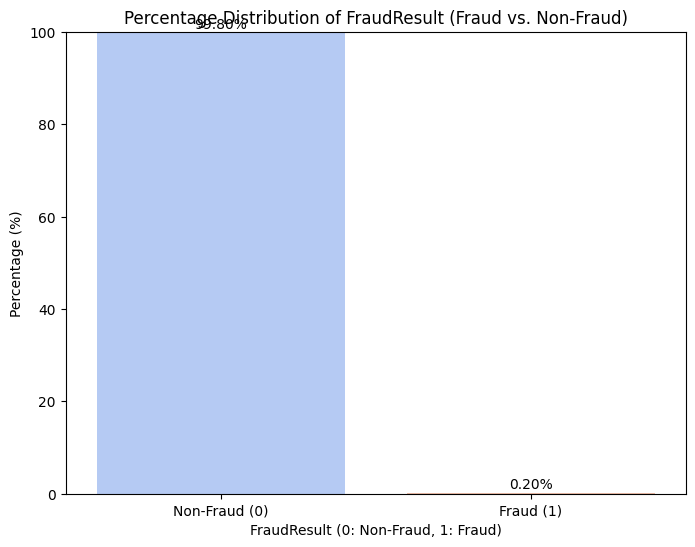


Total number of transactions: 95661
Number of fraudulent transactions: 193
Number of non-fraudulent transactions: 95468


In [11]:
#Quantifying FraudResult (Target Variable) Imbalance
# Assuming 'df' is a cleaned DataFrame from the previous steps

# Get the value counts of FraudResult
fraud_counts = df['FraudResult'].value_counts()

# Calculate the percentage of each class
fraud_percentages = df['FraudResult'].value_counts(normalize=True) * 100

print("Distribution of FraudResult:")
print(fraud_counts)
print("\nPercentage Distribution of FraudResult:")
print(fraud_percentages.round(2))

# Visualize the class imbalance
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_percentages.index, y=fraud_percentages.values, palette='coolwarm')
plt.title('Percentage Distribution of FraudResult (Fraud vs. Non-Fraud)')
plt.xlabel('FraudResult (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.ylim(0, 100) # Ensure y-axis goes to 100%
# Add text labels on top of bars
for i, p in enumerate(fraud_percentages.values):
    plt.text(i, p + 1, f'{p:.2f}%', ha='center') # Adjust p+1 for better placement
plt.show()

print(f"\nTotal number of transactions: {len(df)}")
print(f"Number of fraudulent transactions: {fraud_counts.get(1, 0)}")
print(f"Number of non-fraudulent transactions: {fraud_counts.get(0, 0)}")


Distribution of FraudResult for transactions with negative Amount:
FraudResult
0    38180
1        5
Name: count, dtype: int64

Percentage Distribution for Negative Amount Transactions:
FraudResult
0    99.99
1     0.01
Name: proportion, dtype: float64

Number of transactions where Value is NOT equal to abs(Amount): 2574
Sample of transactions where Value != abs(Amount):
    Amount   Value  FraudResult  is_negative_amount
1   3679.0    20.0            0               False
3  20000.0  1000.0            0               False
5   3679.0  1000.0            0               False
7   -500.0  1000.0            0                True
8   3679.0   500.0            0               False


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\3402186454.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FraudResult', y='Amount', data=df, palette='coolwarm')
C:\Users\eep\AppData\Local\Temp\ipykernel_12172\3402186454.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FraudResult', y='Value', data=df, palette='coolwarm')


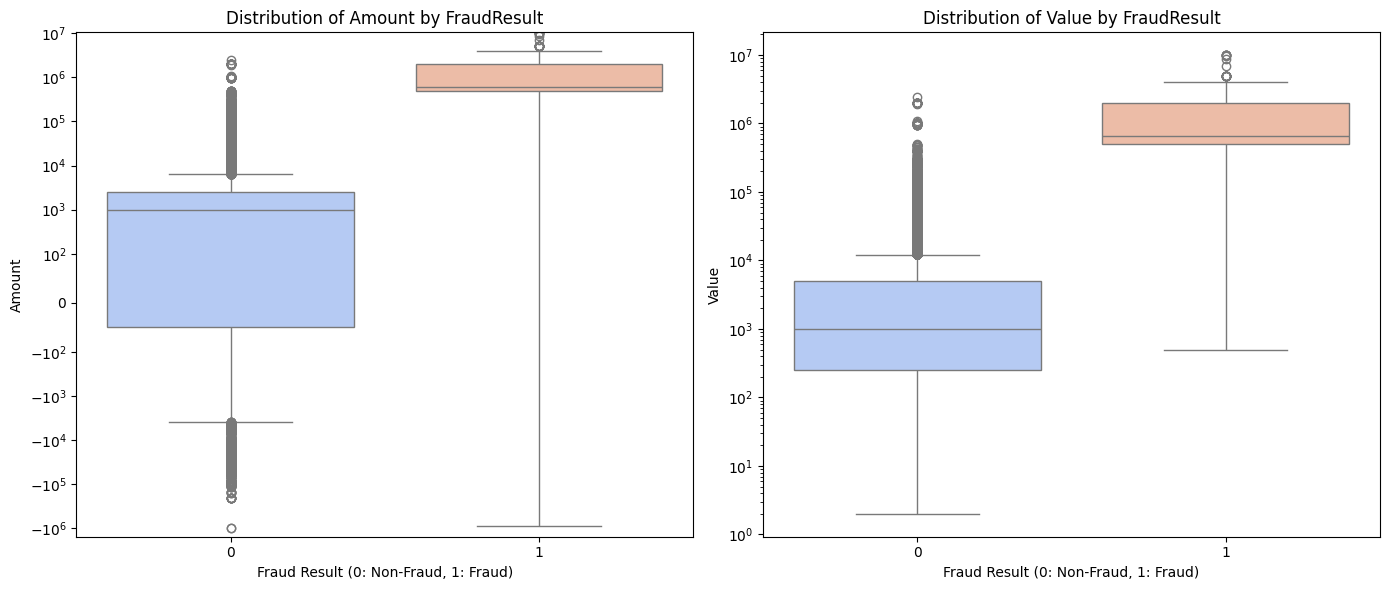


Descriptive statistics for Amount and Value for Fraudulent Transactions:
             Amount         Value
count  1.930000e+02  1.930000e+02
mean   1.535272e+06  1.561820e+06
std    2.100525e+06  2.081227e+06
min   -9.000000e+05  5.000000e+02
25%    5.000000e+05  5.000000e+05
50%    6.000000e+05  6.500000e+05
75%    2.000000e+06  2.000000e+06
max    9.880000e+06  9.880000e+06

Descriptive statistics for Amount and Value for Non-Fraudulent Transactions:
             Amount         Value
count  9.546800e+04  9.546800e+04
mean   3.628039e+03  6.763022e+03
std    4.035730e+04  3.999502e+04
min   -1.000000e+06  2.000000e+00
25%   -5.000000e+01  2.500000e+02
50%    1.000000e+03  1.000000e+03
75%    2.500000e+03  5.000000e+03
max    2.400000e+06  2.400000e+06


In [ ]:
#Detailed Analysis of Amount and Value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is cleaned DataFrame from the previous steps.
# (The cleaning steps from the previous turn would have already been applied to 'df')

# --- Analyze Negative Amount Transactions ---
df['is_negative_amount'] = (df['Amount'] < 0)

print("\nDistribution of FraudResult for transactions with negative Amount:")
negative_amount_fraud_counts = df[df['is_negative_amount']]['FraudResult'].value_counts()
negative_amount_fraud_percentages = df[df['is_negative_amount']]['FraudResult'].value_counts(normalize=True) * 100

print(negative_amount_fraud_counts)
print("\nPercentage Distribution for Negative Amount Transactions:")
print(negative_amount_fraud_percentages.round(2))

# --- Verify Relationship between Amount and Value ---
df['Value_is_abs_Amount'] = (df['Value'] == df['Amount'].abs())
non_abs_match_count = df[df['Value_is_abs_Amount'] == False].shape[0]

print(f"\nNumber of transactions where Value is NOT equal to abs(Amount): {non_abs_match_count}")
if non_abs_match_count > 0:
    print("Sample of transactions where Value != abs(Amount):")
    print(df[df['Value_is_abs_Amount'] == False][['Amount', 'Value', 'FraudResult', 'is_negative_amount']].head())
else:
    print("Value consistently equals abs(Amount) for all transactions.")

df.drop(columns=['Value_is_abs_Amount'], inplace=True)


# --- Visualize Numerical Feature Distributions by FraudResult ---

plt.figure(figsize=(14, 6))

# Box plot for Amount vs. FraudResult
plt.subplot(1, 2, 1)
sns.boxplot(x='FraudResult', y='Amount', data=df, palette='coolwarm')
plt.title('Distribution of Amount by FraudResult')
plt.xlabel('Fraud Result (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.yscale('symlog', linthresh=1e2) # Use symlog scale for better visualization of skewed data with negative values
# REMOVED: plt.ticklabel_format(style='plain', axis='y') as it conflicts with symlog scale

# Box plot for Value vs. FraudResult
plt.subplot(1, 2, 2)
sns.boxplot(x='FraudResult', y='Value', data=df, palette='coolwarm')
plt.title('Distribution of Value by FraudResult')
plt.xlabel('Fraud Result (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Value')
plt.yscale('log') # Use log scale for positively skewed data (only positive values)
# REMOVED: plt.ticklabel_format(style='plain', axis='y') as it conflicts with log scale

plt.tight_layout()
plt.show()

# --- Additional analysis for very large/small amounts ---
print("\nDescriptive statistics for Amount and Value for Fraudulent Transactions:")
print(df[df['FraudResult'] == 1][['Amount', 'Value']].describe())

print("\nDescriptive statistics for Amount and Value for Non-Fraudulent Transactions:")
print(df[df['FraudResult'] == 0][['Amount', 'Value']].describe())

In [14]:
#Identifying Missing Values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
print("\nMissing Values Overview:\n", missing_df)

if not missing_df.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df['Missing %'])
    plt.title('Percentage of Missing Values per Column')
    plt.ylabel('Missing %')
    plt.xlabel('Column Name')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")


Missing Values Overview:
 Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []
No missing values found in the dataset.


Numerical columns for box plotting: ['Amount', 'Value']


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\670142722.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis') # Added palette for consistency
C:\Users\eep\AppData\Local\Temp\ipykernel_12172\670142722.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis') # Added palette for consistency


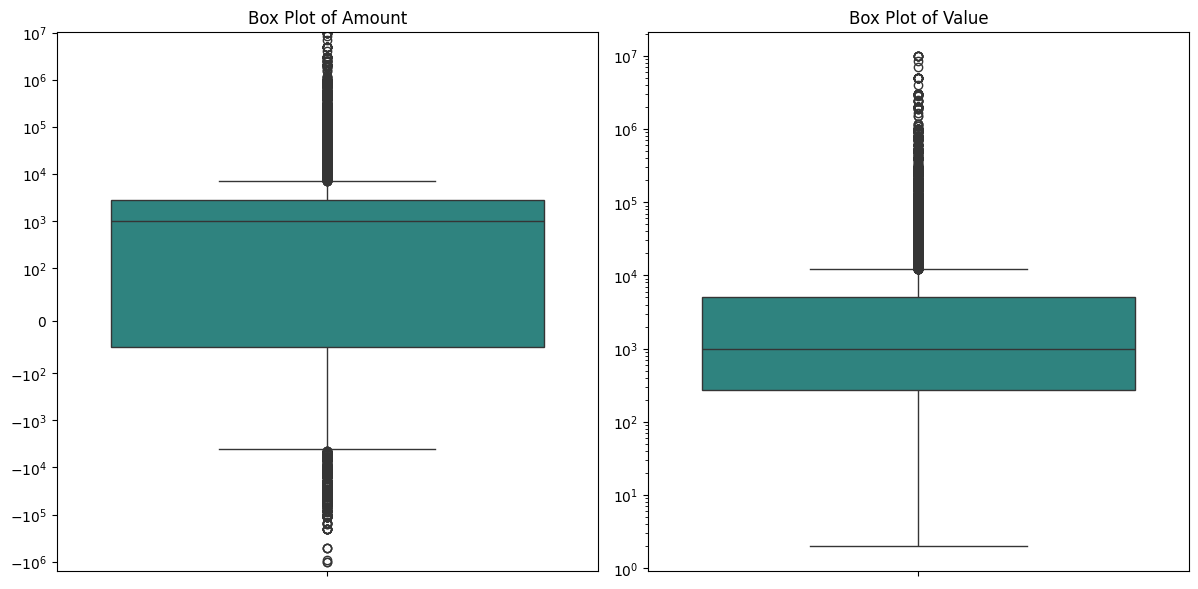

In [16]:
#Outlier Detection
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your cleaned DataFrame from previous steps.

# Define the numerical columns that are actually in your cleaned DataFrame
# Based on our EDA, these are 'Amount', 'Value', and 'FraudResult'.
# We can also use df.select_dtypes(include=np.number).columns.tolist() to be robust.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# If FraudResult is in numerical_cols and you don't want to boxplot it (as it's binary), you can remove it:
if 'FraudResult' in numerical_cols:
    numerical_cols.remove('FraudResult')

# If 'is_negative_amount' was created and is boolean/numerical, and you don't want to boxplot it:
if 'is_negative_amount' in numerical_cols:
    numerical_cols.remove('is_negative_amount')


cols_to_plot = numerical_cols # Now cols_to_plot only contains 'Amount' and 'Value'

print(f"Numerical columns for box plotting: {cols_to_plot}")

plt.figure(figsize=(18, 6)) # Adjusted figsize as there are likely fewer plots now

if not cols_to_plot:
    print("No numerical columns found to plot box plots for.")
else:
    for i, col in enumerate(cols_to_plot):
        # Calculate subplot grid dynamically based on number of columns
        num_cols = len(cols_to_plot)
        n_rows = (num_cols + 2) // 3 # 3 columns per row, adjust rows accordingly

        plt.subplot(n_rows, 3, i + 1)
        sns.boxplot(y=df[col], palette='viridis') # Added palette for consistency
        plt.title(f'Box Plot of {col}')
        plt.ylabel('') # Keep y-label clean
        
        # Apply symlog or log scale if the data range is very wide
        if col in ['Amount', 'Value']:
            if col == 'Amount':
                plt.yscale('symlog', linthresh=1e2) # For Amount, to handle negative values
            else: # col == 'Value'
                plt.yscale('log') # For Value, as it's positive and skewed

    plt.tight_layout()
    plt.show()

--- Bivariate Analysis: Categorical Features vs. FraudRate ---

Analyzing 'ProviderId' vs. FraudRate:
     ProviderId  FraudRate (%)
2  ProviderId_3       2.075900
0  ProviderId_1       1.010101
4  ProviderId_5       0.440105
3  ProviderId_4       0.013092
5  ProviderId_6       0.008776
1  ProviderId_2       0.000000


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\4093493019.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudRate (%)', y=col, data=fraud_rate_df, palette='viridis')


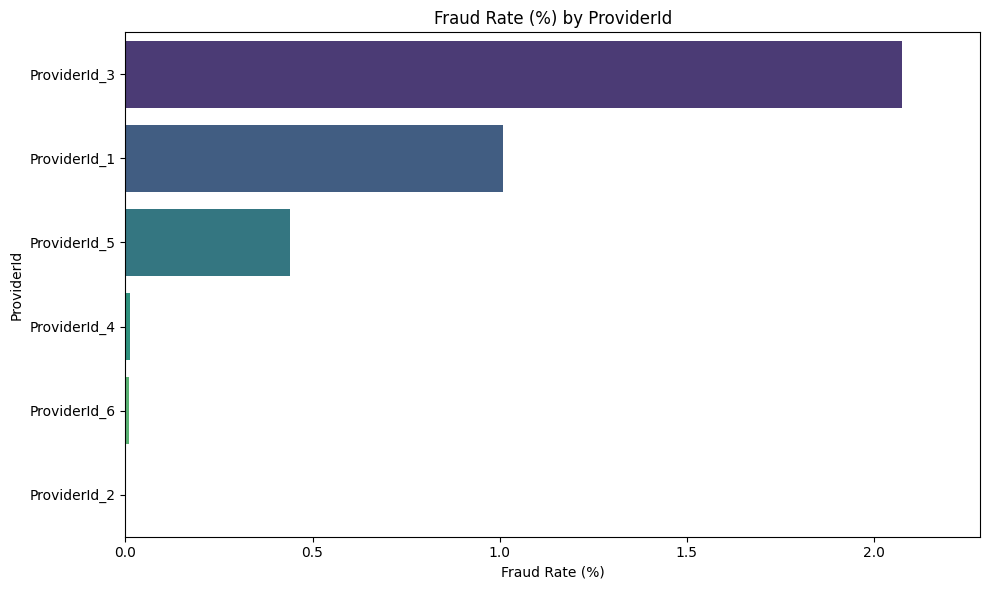

C:\Users\eep\AppData\Local\Temp\ipykernel_12172\4093493019.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudRate (%)', y=col, data=fraud_rate_df, palette='viridis')



Analyzing 'ProductId' vs. FraudRate:
       ProductId  FraudRate (%)
22   ProductId_9      17.647059
18   ProductId_5       8.000000
4   ProductId_13       2.027027
12  ProductId_22       1.785714
6   ProductId_15       1.312270
11  ProductId_21       0.264550
16   ProductId_3       0.049293
1   ProductId_10       0.039002
19   ProductId_6       0.003064
0    ProductId_1       0.000000
2   ProductId_11       0.000000
5   ProductId_14       0.000000
3   ProductId_12       0.000000
7   ProductId_16       0.000000
8   ProductId_19       0.000000
14  ProductId_24       0.000000
13  ProductId_23       0.000000
9    ProductId_2       0.000000
10  ProductId_20       0.000000
17   ProductId_4       0.000000
15  ProductId_27       0.000000
20   ProductId_7       0.000000
21   ProductId_8       0.000000


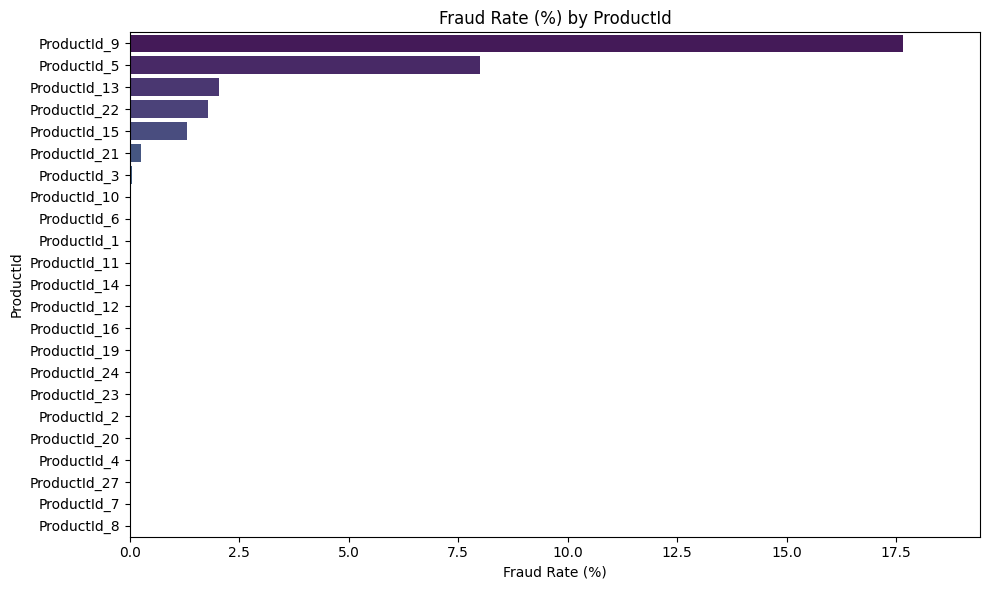


Analyzing 'ProductCategory' vs. FraudRate:
      ProductCategory  FraudRate (%)
6           transport       8.000000
8        utility_bill       0.625000
2  financial_services       0.354594
0             airtime       0.039976
1        data_bundles       0.000000
4               other       0.000000
3              movies       0.000000
5              ticket       0.000000
7                  tv       0.000000


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\4093493019.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudRate (%)', y=col, data=fraud_rate_df, palette='viridis')


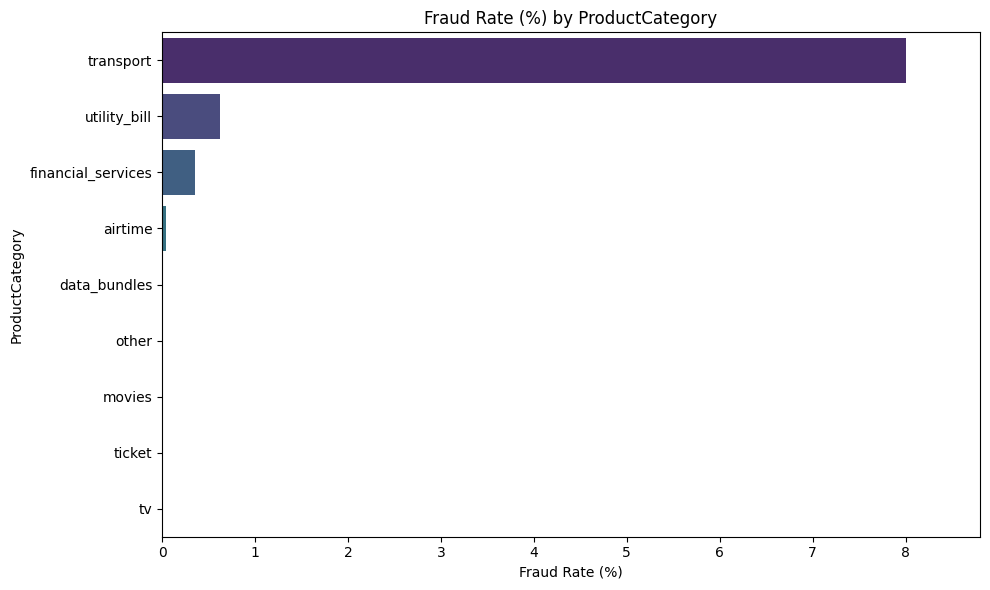


Analyzing 'ChannelId' vs. FraudRate:
     ChannelId  FraudRate (%)
0  ChannelId_1       0.743494
2  ChannelId_3       0.323176
1  ChannelId_2       0.013463
3  ChannelId_5       0.000000


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\4093493019.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudRate (%)', y=col, data=fraud_rate_df, palette='viridis')


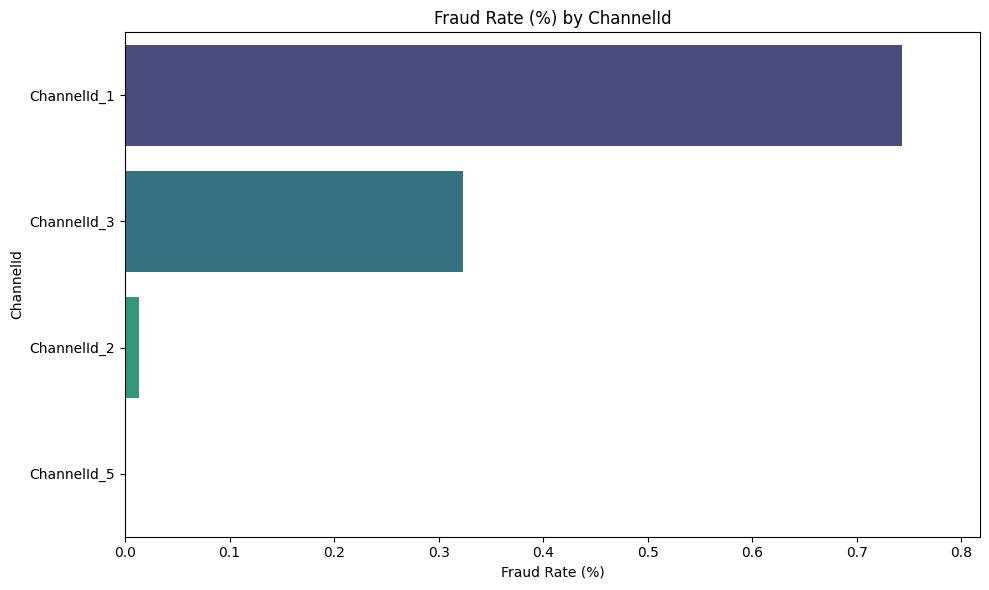


Analyzing 'PricingStrategy' vs. FraudRate:
  PricingStrategy  FraudRate (%)
0             0.0       9.350649
1             1.0       0.374933
2             2.0       0.174074
3             4.0       0.081133


C:\Users\eep\AppData\Local\Temp\ipykernel_12172\4093493019.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudRate (%)', y=col, data=fraud_rate_df, palette='viridis')


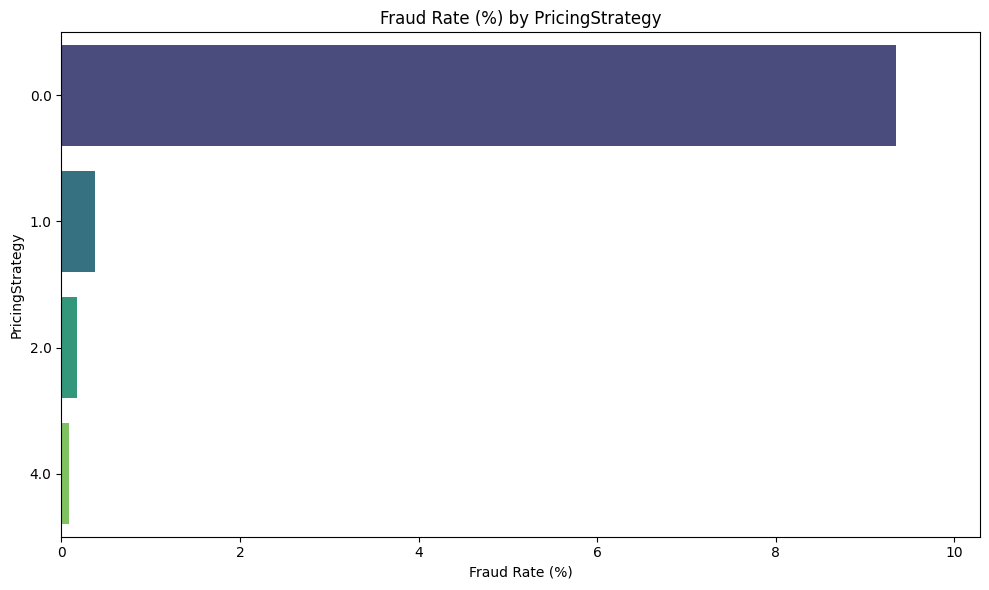

In [19]:
#Bivariate Analysis: Categorical Features vs. FraudResult

# Assuming 'df' is your cleaned DataFrame from previous steps.
# If starting a new session, ensure 'df' is loaded and cleaned as per previous steps.

# List of categorical columns identified previously (excluding high-cardinality IDs)
categorical_cols_for_bivariate = [
    'ProviderId',
    'ProductId',
    'ProductCategory',
    'ChannelId',
    'PricingStrategy'
]

print("--- Bivariate Analysis: Categorical Features vs. FraudRate ---")

for col in categorical_cols_for_bivariate:
    print(f"\nAnalyzing '{col}' vs. FraudRate:")

    # Calculate fraud rate for each category
    # Sum of FraudResult (1s) / Count of transactions in that category
    fraud_rate = df.groupby(col)['FraudResult'].mean() * 100
    fraud_rate_df = fraud_rate.reset_index()
    fraud_rate_df.columns = [col, 'FraudRate (%)']

    # Sort by FraudRate for better visualization
    fraud_rate_df = fraud_rate_df.sort_values(by='FraudRate (%)', ascending=False)

    print(fraud_rate_df)

    # Visualize the fraud rate
    plt.figure(figsize=(10, 6))
    sns.barplot(x='FraudRate (%)', y=col, data=fraud_rate_df, palette='viridis')
    plt.title(f'Fraud Rate (%) by {col}')
    plt.xlabel('Fraud Rate (%)')
    plt.ylabel(col)
    plt.xlim(0, fraud_rate_df['FraudRate (%)'].max() * 1.1 if fraud_rate_df['FraudRate (%)'].max() > 0 else 1) # Adjust xlim for readability
    plt.tight_layout()
    plt.show()


--- Time-Based Analysis ---

Transaction Volume & Fraud Rate by Hour of Day:
    transaction_hour  total_transactions  fraud_transactions  fraud_rate
0                  0                 168                   1    0.595238
1                  1                 176                   0    0.000000
2                  2                 289                   0    0.000000
3                  3                 714                   7    0.980392
4                  4                2328                   0    0.000000
5                  5                4161                   6    0.144196
6                  6                5325                   7    0.131455
7                  7                5723                   9    0.157260
8                  8                5639                   8    0.141869
9                  9                5443                  10    0.183722
10                10                5986                   4    0.066823
11                11                6226      

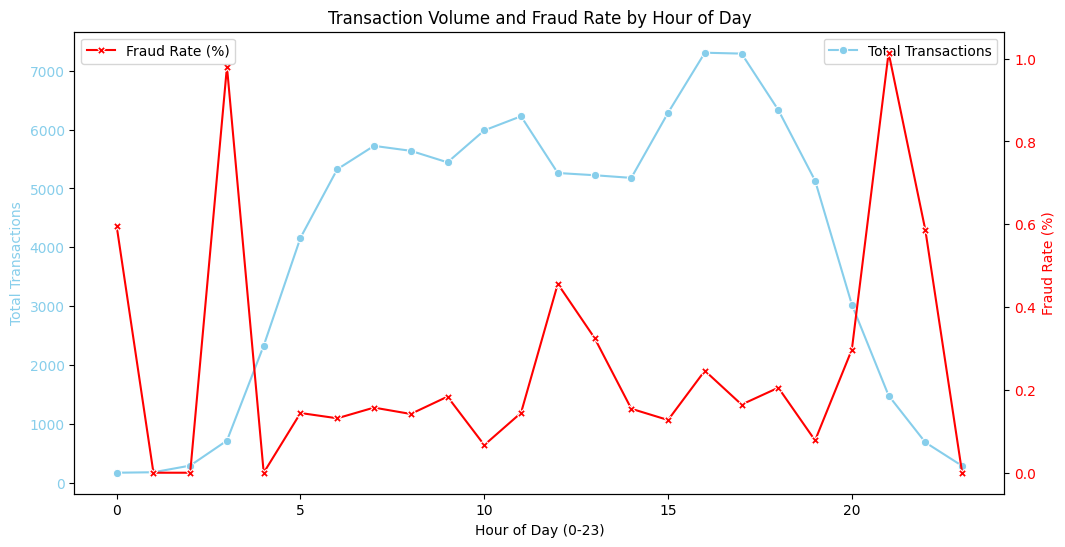


Transaction Volume & Fraud Rate by Day of Week:
  transaction_day_of_week_name  total_transactions  fraud_transactions  \
0                       Monday               11837                  29   
1                      Tuesday               15049                  31   
2                    Wednesday               10232                  29   
3                     Thursday               11039                  34   
4                       Friday               27715                  30   
5                     Saturday               10103                  25   
6                       Sunday                9686                  15   

   fraud_rate  
0    0.244995  
1    0.205994  
2    0.283425  
3    0.307999  
4    0.108245  
5    0.247451  
6    0.154863  


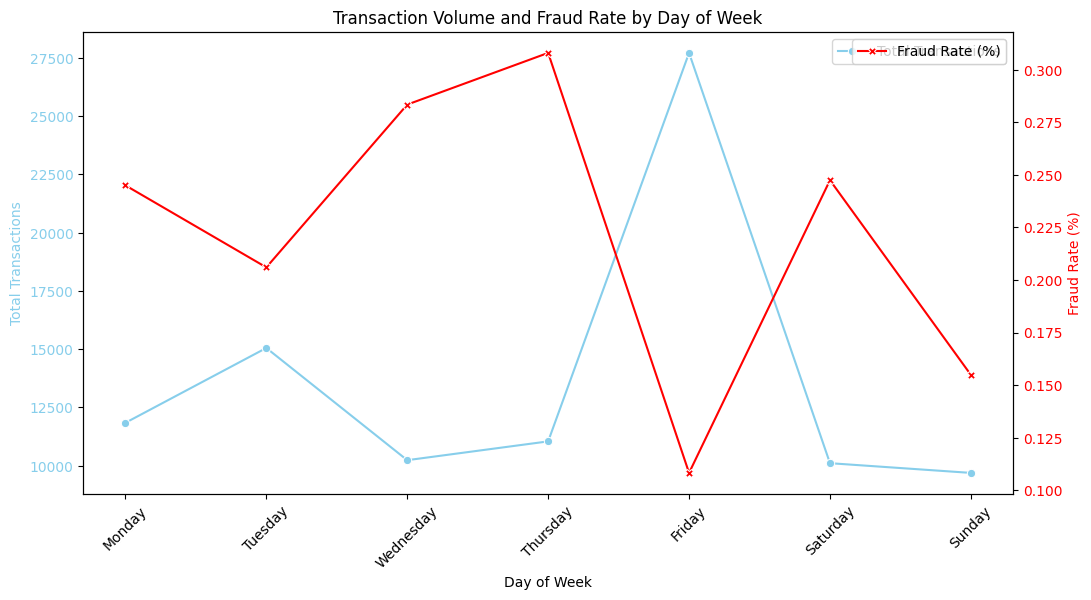


Transaction Volume & Fraud Rate by Month:
   transaction_month  total_transactions  fraud_transactions  fraud_rate
0                  1               31783                  64    0.201366
1                  2               15772                  53    0.336039
2                 11               12471                  14    0.112260
3                 12               35635                  62    0.173986


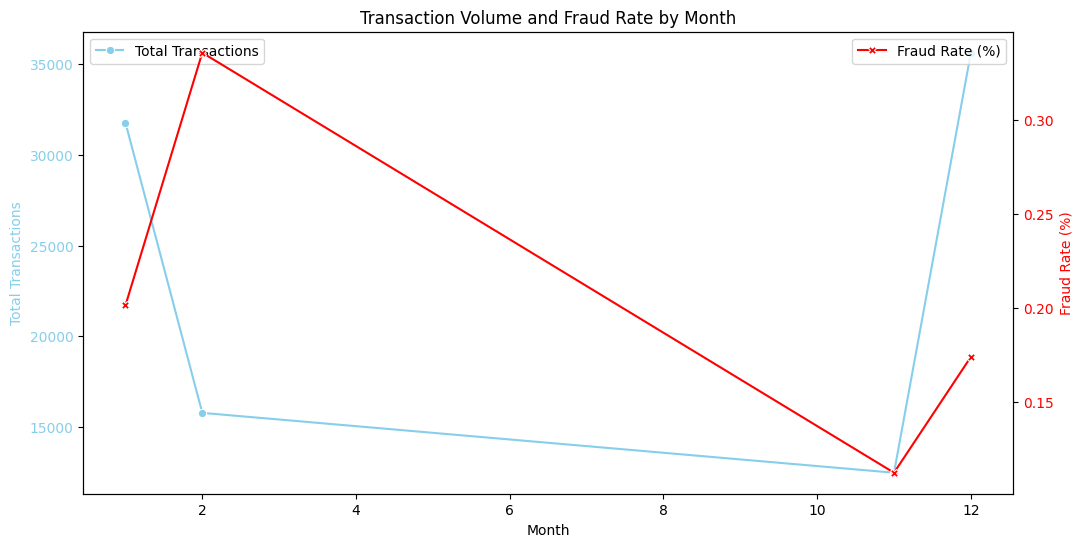


Transaction Volume & Fraud Rate by Year:
   transaction_year  total_transactions  fraud_transactions  fraud_rate
0              2018               48106                  76    0.157984
1              2019               47555                 117    0.246031


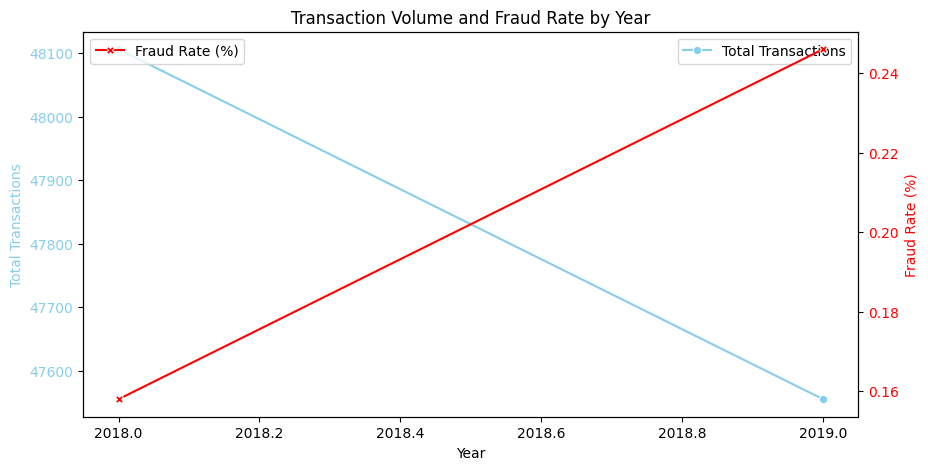

In [ ]:
#Time-Based Analysis
# Ensure 'TransactionStartTime' is in datetime format
# (This was already done in previous cleaning steps, but good to ensure if running isolated)
if 'TransactionStartTime' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['TransactionStartTime']):
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')
    df.dropna(subset=['TransactionStartTime'], inplace=True) # Drop rows where conversion failed


print("\n--- Time-Based Analysis ---")

# Extract time-based features
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day_of_week'] = df['TransactionStartTime'].dt.dayofweek # Monday=0, Sunday=6
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year

# Convert day_of_week to names for better readability in plots
df['transaction_day_of_week_name'] = df['transaction_day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Define order for day of week for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Analyze transaction volume and fraud rate by hour of day
print("\nTransaction Volume & Fraud Rate by Hour of Day:")
hourly_stats = df.groupby('transaction_hour').agg(
    total_transactions=('TransactionId', 'count'),
    fraud_transactions=('FraudResult', lambda x: (x == 1).sum()),
    fraud_rate=('FraudResult', 'mean')
).reset_index()
hourly_stats['fraud_rate'] = hourly_stats['fraud_rate'] * 100 # Convert to percentage
print(hourly_stats)

# Plot transaction volume and fraud rate by hour
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='transaction_hour', y='total_transactions', data=hourly_stats, marker='o', ax=ax1, color='skyblue', label='Total Transactions')
ax1.set_xlabel('Hour of Day (0-23)')
ax1.set_ylabel('Total Transactions', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Transaction Volume and Fraud Rate by Hour of Day')

ax2 = ax1.twinx()
sns.lineplot(x='transaction_hour', y='fraud_rate', data=hourly_stats, marker='X', ax=ax2, color='red', label='Fraud Rate (%)')
ax2.set_ylabel('Fraud Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False) # Remove grid for second y-axis
plt.show()


# Analyze transaction volume and fraud rate by day of week
print("\nTransaction Volume & Fraud Rate by Day of Week:")
daily_stats = df.groupby('transaction_day_of_week_name').agg(
    total_transactions=('TransactionId', 'count'),
    fraud_transactions=('FraudResult', lambda x: (x == 1).sum()),
    fraud_rate=('FraudResult', 'mean')
).reindex(day_order).reset_index() # Reindex to ensure correct order
daily_stats['fraud_rate'] = daily_stats['fraud_rate'] * 100
print(daily_stats)

# Plot transaction volume and fraud rate by day of week
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='transaction_day_of_week_name', y='total_transactions', data=daily_stats, marker='o', ax=ax1, color='skyblue', label='Total Transactions')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Transactions', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Transaction Volume and Fraud Rate by Day of Week')
ax1.tick_params(axis='x', rotation=45) # Rotate x-axis labels

ax2 = ax1.twinx()
sns.lineplot(x='transaction_day_of_week_name', y='fraud_rate', data=daily_stats, marker='X', ax=ax2, color='red', label='Fraud Rate (%)')
ax2.set_ylabel('Fraud Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)
plt.show()


# Analyze transaction volume and fraud rate by month (if data spans multiple months)
if df['transaction_month'].nunique() > 1:
    print("\nTransaction Volume & Fraud Rate by Month:")
    monthly_stats = df.groupby('transaction_month').agg(
        total_transactions=('TransactionId', 'count'),
        fraud_transactions=('FraudResult', lambda x: (x == 1).sum()),
        fraud_rate=('FraudResult', 'mean')
    ).reset_index()
    monthly_stats['fraud_rate'] = monthly_stats['fraud_rate'] * 100
    print(monthly_stats)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    sns.lineplot(x='transaction_month', y='total_transactions', data=monthly_stats, marker='o', ax=ax1, color='skyblue', label='Total Transactions')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Total Transactions', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_title('Transaction Volume and Fraud Rate by Month')

    ax2 = ax1.twinx()
    sns.lineplot(x='transaction_month', y='fraud_rate', data=monthly_stats, marker='X', ax=ax2, color='red', label='Fraud Rate (%)')
    ax2.set_ylabel('Fraud Rate (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(False)
    plt.show()
else:
    print("\nData only spans one month, skipping monthly trend analysis.")

# Analyze transaction volume and fraud rate by year (if data spans multiple years)
if df['transaction_year'].nunique() > 1:
    print("\nTransaction Volume & Fraud Rate by Year:")
    yearly_stats = df.groupby('transaction_year').agg(
        total_transactions=('TransactionId', 'count'),
        fraud_transactions=('FraudResult', lambda x: (x == 1).sum()),
        fraud_rate=('FraudResult', 'mean')
    ).reset_index()
    yearly_stats['fraud_rate'] = yearly_stats['fraud_rate'] * 100
    print(yearly_stats)

    fig, ax1 = plt.subplots(figsize=(10, 5))
    sns.lineplot(x='transaction_year', y='total_transactions', data=yearly_stats, marker='o', ax=ax1, color='skyblue', label='Total Transactions')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Transactions', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_title('Transaction Volume and Fraud Rate by Year')

    ax2 = ax1.twinx()
    sns.lineplot(x='transaction_year', y='fraud_rate', data=yearly_stats, marker='X', ax=ax2, color='red', label='Fraud Rate (%)')
    ax2.set_ylabel('Fraud Rate (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(False)
    plt.show()
else:
    print("\nData only spans one year, skipping yearly trend analysis.")